<a href="https://colab.research.google.com/github/cirilwakounig/MachineLearning/blob/main/1.1_Predicting_Housing_Prices_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Machine Learning on Kaggle

This script is based on the course 'Introduction to Machine Learning found on Kaggle' using Decision Trees. It is extended by an iterative way of finding the optimal hyperparameters for the regressor and a graphical comparison of model errors.



#### 1. Exploring your Data

---







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path of the file to read
iowa_file_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle Course/Intro to Machine Learning/train.csv'

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)


In [ ]:
# Print summary statistics in next line
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Print the first few lines of your data to check if they are fine.

home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 2. Data Preparation

---





In order to start with predicting values, the data needs to be divided into independent (features, X) and dependent data (predicted data, y). It is wise to first explore the column names to see the available data

In [ ]:
# Exploring column names
column_names = home_data.columns
print(column_names)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Predicted Values: Housing Prices
y = home_data.SalePrice

In [ ]:
# Selecting Features to use to train the model
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

X = home_data[feature_names]

Before starting to model, it is wise to look through the feature data.

In [ ]:
# Printing Statistics for feature data
print(X.describe())

             LotArea    YearBuilt  ...  BedroomAbvGr  TotRmsAbvGrd
count    1460.000000  1460.000000  ...   1460.000000   1460.000000
mean    10516.828082  1971.267808  ...      2.866438      6.517808
std      9981.264932    30.202904  ...      0.815778      1.625393
min      1300.000000  1872.000000  ...      0.000000      2.000000
25%      7553.500000  1954.000000  ...      2.000000      5.000000
50%      9478.500000  1973.000000  ...      3.000000      6.000000
75%     11601.500000  2000.000000  ...      3.000000      7.000000
max    215245.000000  2010.000000  ...      8.000000     14.000000

[8 rows x 7 columns]


In [ ]:
# Printing first lines for feature data
print(X.head())

   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  TotRmsAbvGrd
0     8450       2003       856       854         2             3             8
1     9600       1976      1262         0         2             3             6
2    11250       2001       920       866         2             3             6
3     9550       1915       961       756         1             3             7
4    14260       2000      1145      1053         2             4             9


In [ ]:
# Before being able to train a model, the data needs to be split into a training set and a test/validation set. 
from sklearn.model_selection import train_test_split

# Splitting the data (random_state = 1 leads to always the same split, in case one would like to check the exact same split every time; usually 0)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 1)

After having checked and split the data, one can now develop the model. Here, we are using a Decision Tree Regressor using sklearn. 

#### 3. Model Development

---



In [ ]:
# Import the necessary model
from sklearn.tree import DecisionTreeRegressor

# Develop Model
iowa_model = DecisionTreeRegressor(random_state = 1)

# Fitting the Model
iowa_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
# Make Predictions using the validation set
predictions_val = iowa_model.predict(X_val)
predictions_val[:5]

array([186500., 184000., 130000.,  92000., 164500.])

In [ ]:
# Compare predictions with actual values
print(y_val.head())

258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64


#### 4. Model Validation

---



In [ ]:
# Validate your model using the mean absolute error (MAE). Error is defined as: error = actual - predictions
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y_val, predictions_val)
print(val_mae)

29652.931506849316


#### 5. Model Selection

---



In this section, code to select model based on performance is shown. To compare models, model validation using MAE is conducted. 

In [ ]:
# Develops a function that returns train and validation error with a given number of leaf nodes
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, X_train, y_train, X_val, y_val):

  # Define Model and fit to training data
  model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 0)
  model.fit(X_train, y_train)

  # Make Predictions
  pred_train = model.predict(X_train)
  pred_val = model.predict(X_val)

  # Calculate errors
  mae_train = mean_absolute_error(y_train, pred_train)
  mae_val = mean_absolute_error(y_val, pred_val)

  return (mae_train, mae_val)
  

In [ ]:
# Run the function to return the erros using get_mae() defined above
max_leaf_nodes = 50
mae_train, mae_val = get_mae(max_leaf_nodes, X_train, y_train, X_val, y_val) 
print(mae_train,'  ', mae_val)

19641.12270205718    27405.930473214907


In [ ]:
# Iterate over the get_mae() function using different leaf values, to obtain error for different leaf values
max_leaf_nodes = np.linspace(5,500, 11, endpoint = True)
max_leaf_nodes = max_leaf_nodes.astype(int)

errors_train = []
errors_val = []

for i in max_leaf_nodes:
  mae_train, mae_val = get_mae(i, X_train, y_train, X_val, y_val) 
  errors_train.append(mae_train)
  errors_val.append(mae_val) 

Text(0, 0.5, 'Mean Average Error [$]')

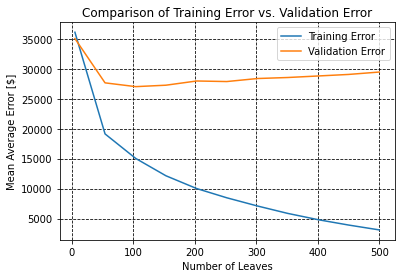

In [ ]:
# Displaying the error values based on different maximum leaf values 
plt.plot(max_leaf_nodes, errors_train)
plt.plot(max_leaf_nodes, errors_val)
plt.grid(axis = 'both', which = 'major', color = 'black', linestyle = 'dashed')
plt.legend(['Training Error', 'Validation Error'])
plt.title('Comparison of Training Error vs. Validation Error')
plt.xlabel('Number of Leaves')
plt.ylabel('Mean Average Error [$]')

In [ ]:
# Choosing the best hyperparameter that returns the lowest validation error from the list of possible leaves
opt_index = errors_val.index(min(errors_val))
optimal_leaf = max_leaf_nodes[opt_index]
print('The optimal number of leaves amounts to:',optimal_leaf)

The optimal number of leaves amounts to: 104
